# Linear Regression from Scratch in python


__Linear Regerssion__:
Linear regersion is a statistical tool to modelling the relationship between explanatory variable and real values variable.


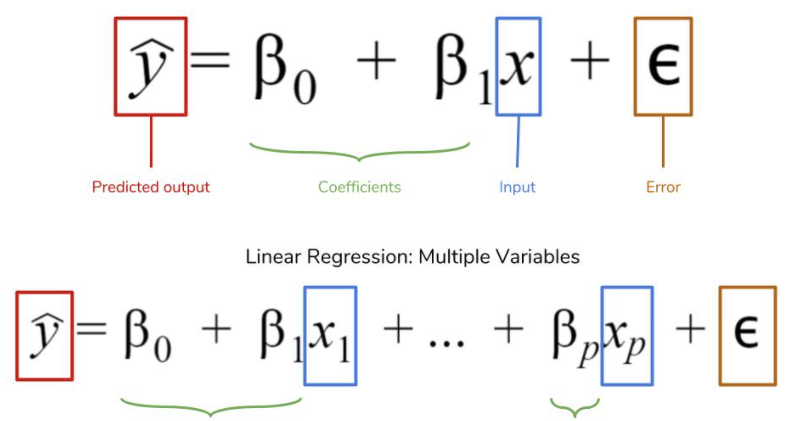
<!--  -->

<!-- 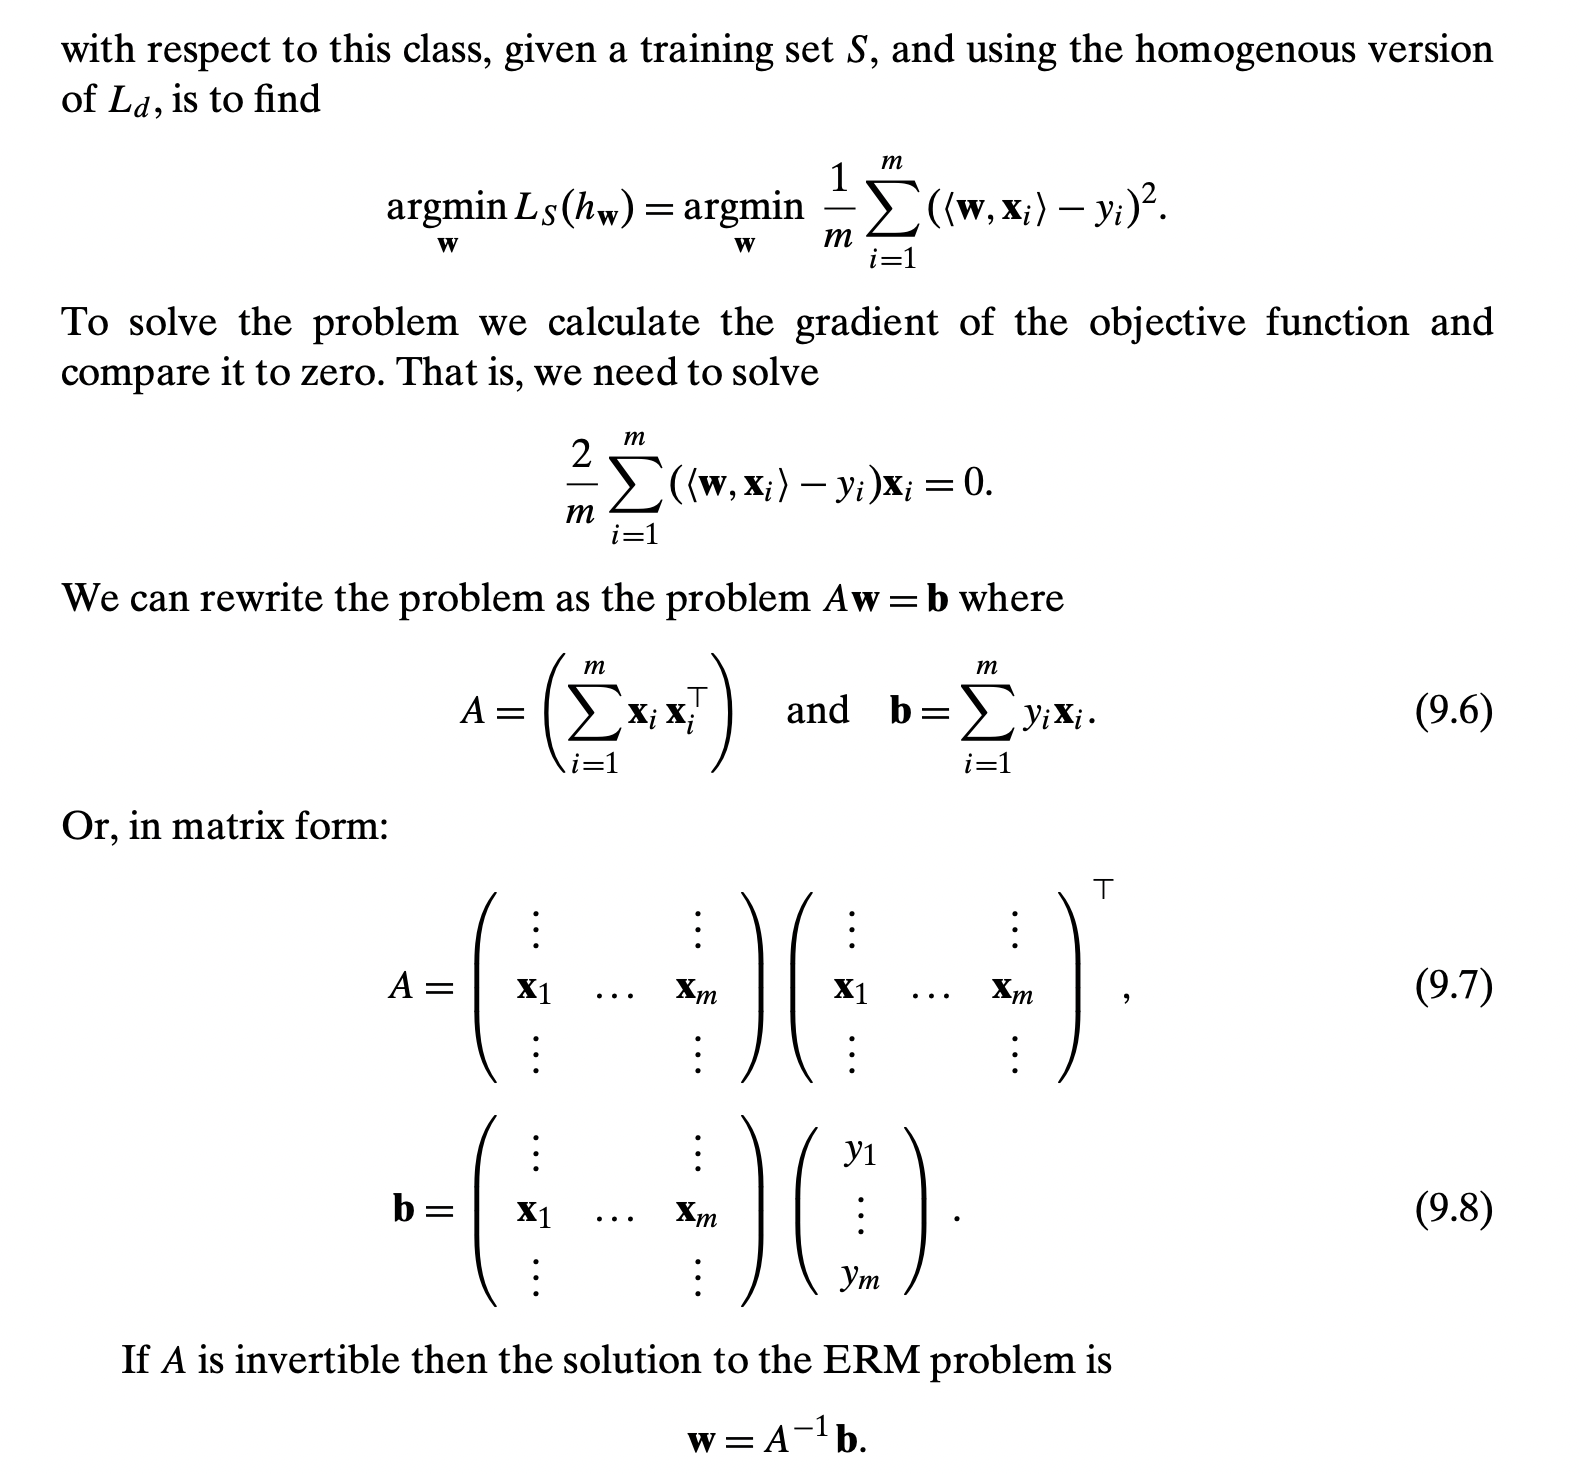 -->
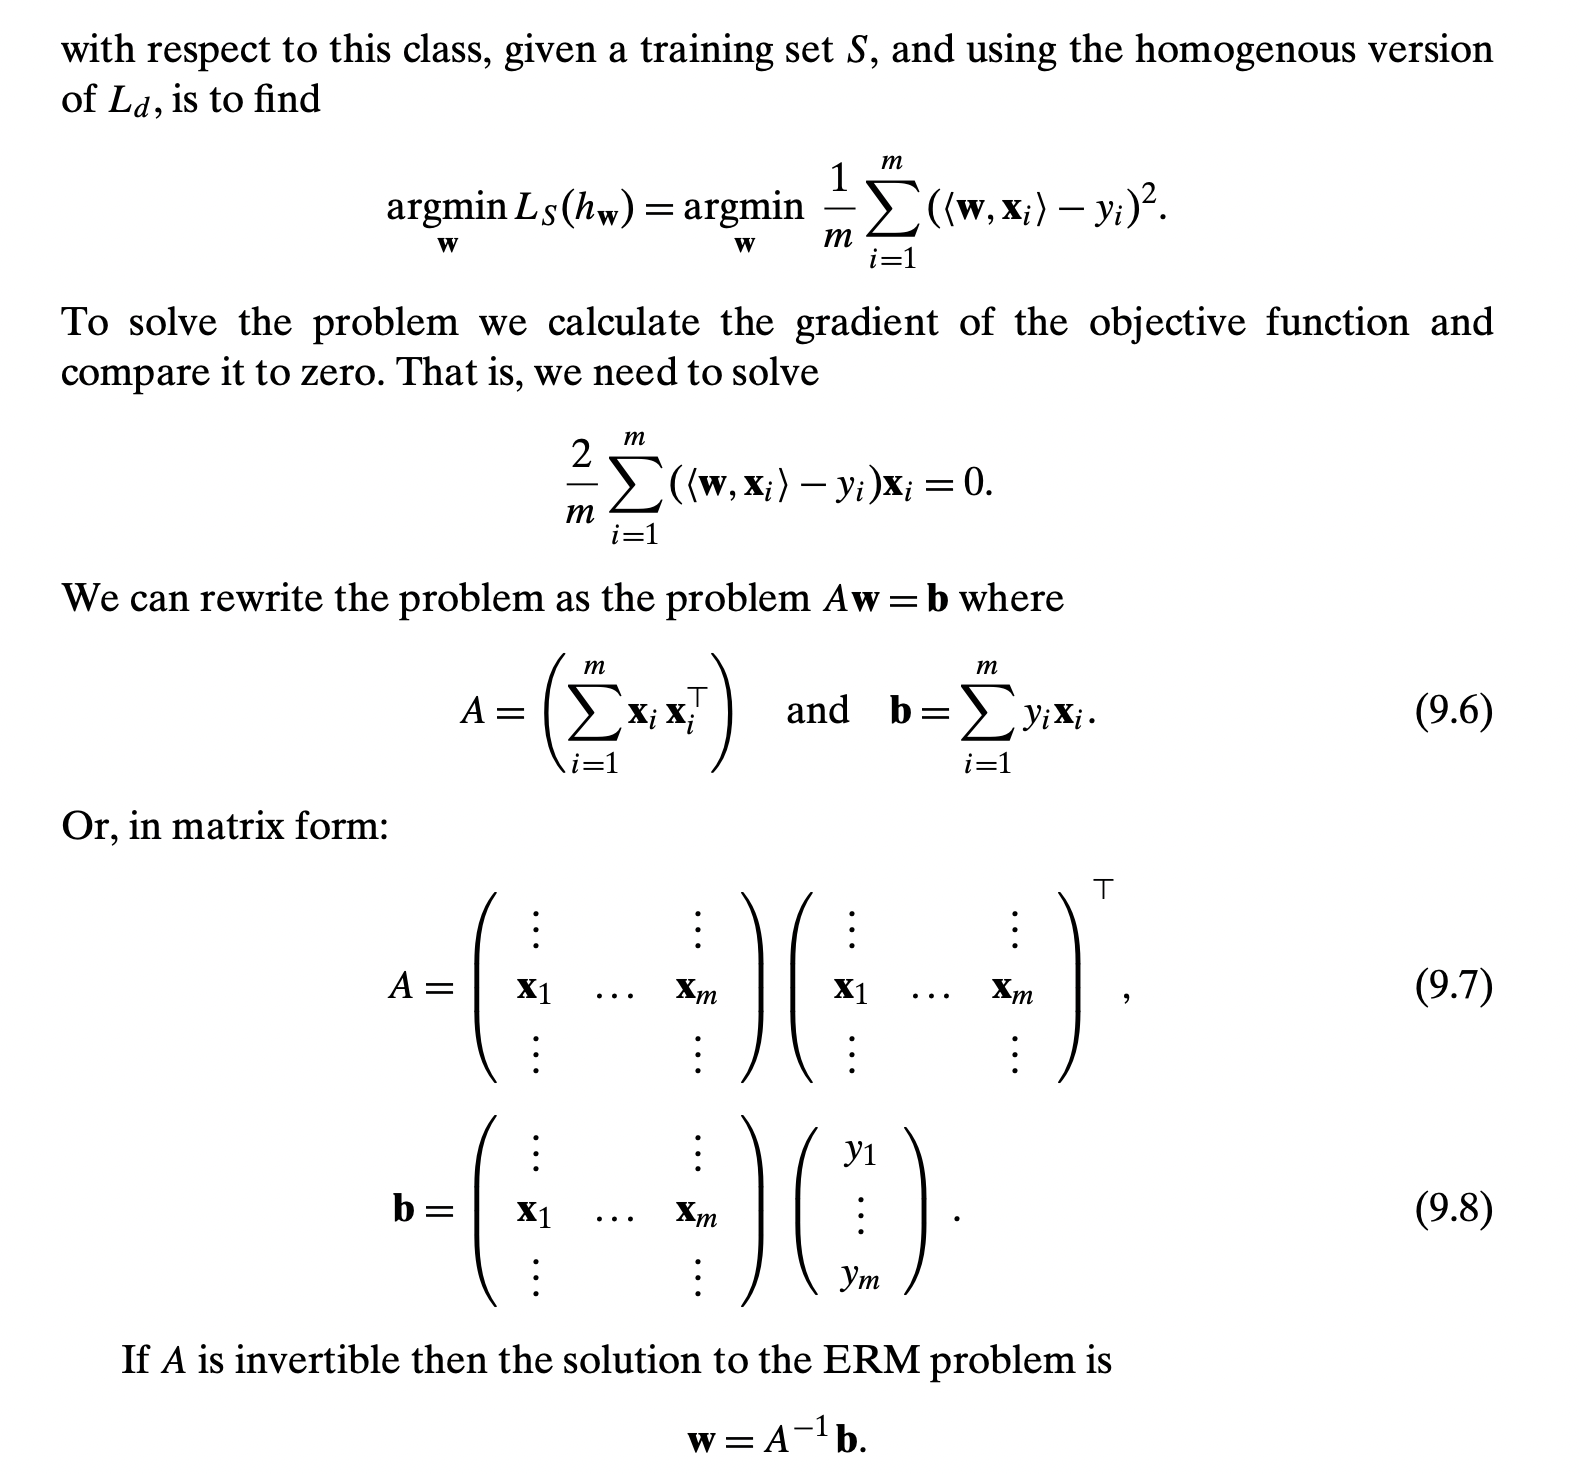

<!-- 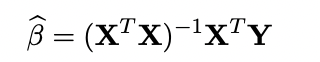 -->
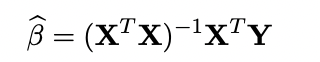
__There are four assumptions associated with a linear regression model:__

- __Linearity:__ The relationship between X and the mean of Y is linear.
- __Homoscedasticity:__ The variance of residual is the same for any value of X.
- __Independence:__ Observations are independent of each other.
- __Normality:__ For any fixed value of X, Y is normally distributed.




# Why Multicolinearity effects the model

In linear algebra, an n-by-n square matrix A is called invertible (also nonsingular or nondegenerate), if there exists an n-by-n square matrix B such that

__AB=BA=I__

A square matrix is singular if and only if its determinant is zero

<!-- 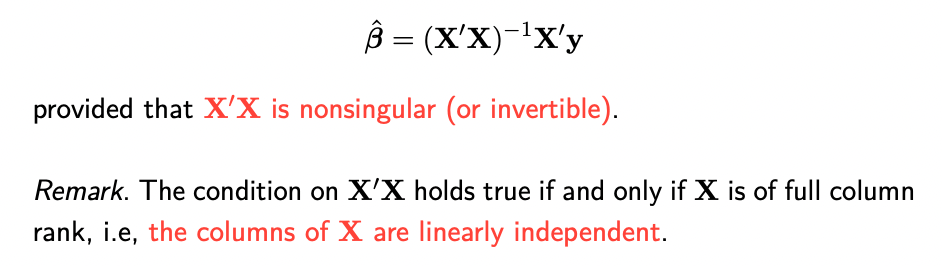 -->
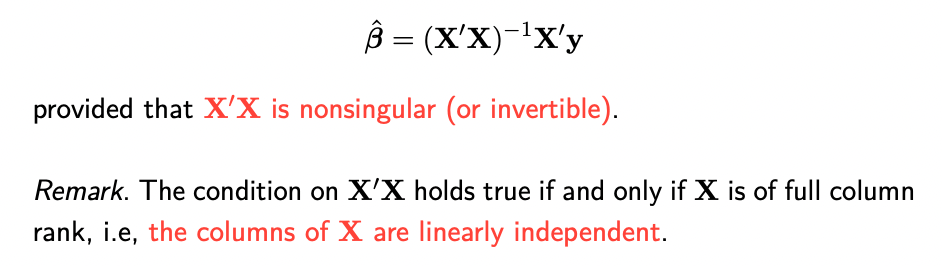

__A square matrix is singular if and only if its determinant is zero.__

<!-- 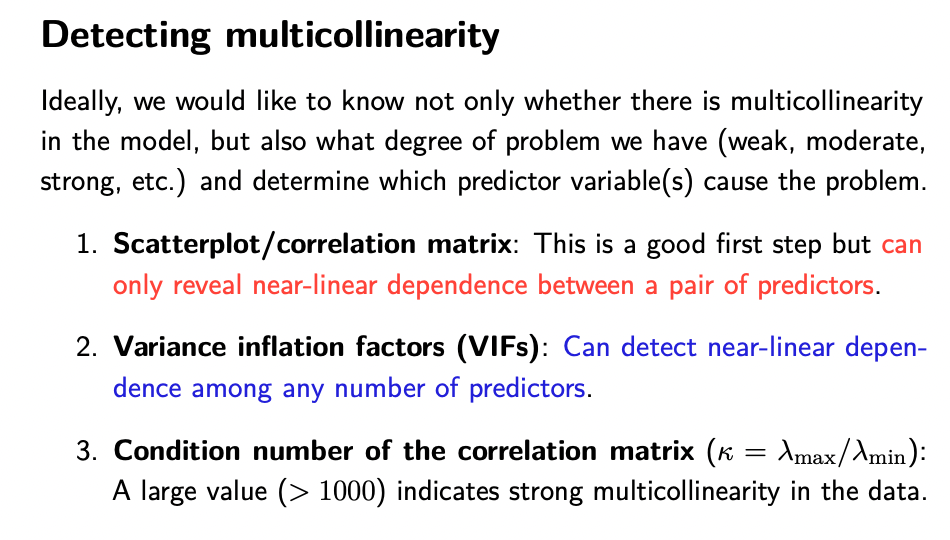 -->
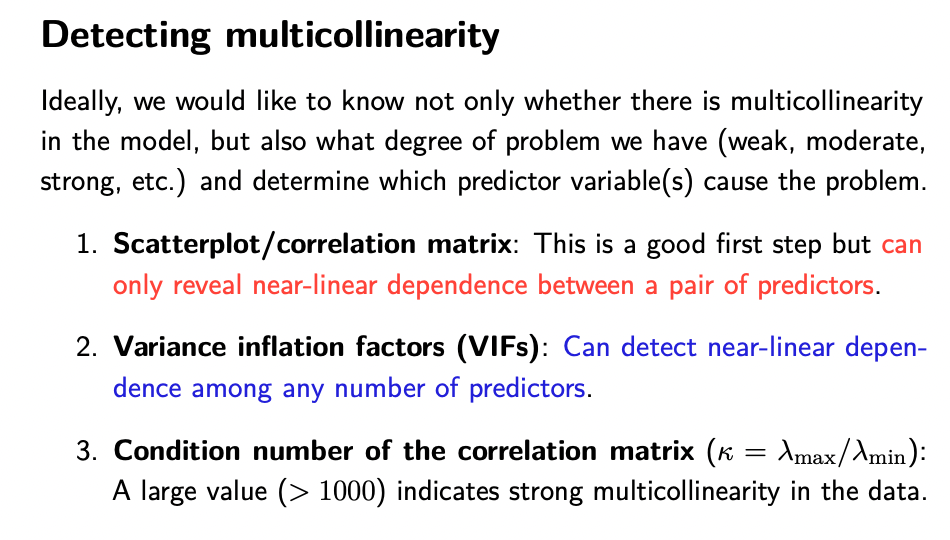

<!-- 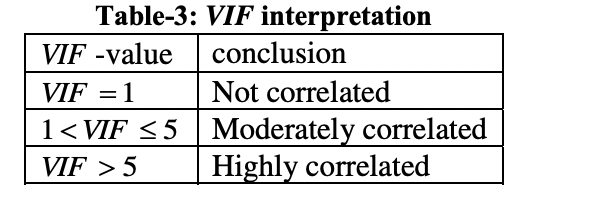 -->
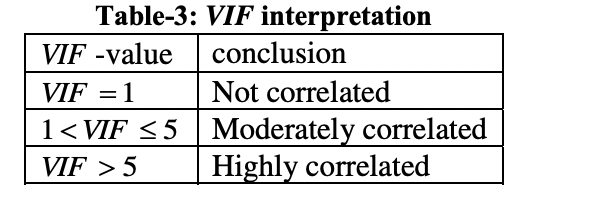

In [143]:
# testing what is this 
import numpy as np 
import pandas as pd 

# when we have two columns same value 
x=np.random.randint(1,10,(4,3))
x[:,1]=x[:,0]
print(x)
xt=x.transpose()
print(xt)
print(np.dot(xt,x))
print(np.linalg.det(np.dot(xt,x)))

# when we have two columns different value

x=np.random.randint(1,10,(4,3))
print(x)
xt=x.transpose()
print(xt)
print(np.dot(xt,x))
print(np.linalg.det(np.dot(xt,x)))

[[7 7 9]
 [8 8 2]
 [5 5 1]
 [2 2 4]]
[[7 8 5 2]
 [7 8 5 2]
 [9 2 1 4]]
[[142 142  92]
 [142 142  92]
 [ 92  92 102]]
0.0
[[8 1 1]
 [6 9 4]
 [4 1 7]
 [8 4 7]]
[[8 6 4 8]
 [1 9 1 4]
 [1 4 7 7]]
[[180  98 116]
 [ 98  99  72]
 [116  72 115]]
316567.9999999995


# Why homscedasticity effects linear regression
The assumption of homoscedasticity (meaning “same variance”) is central to linear regression models.  Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables.  Heteroscedasticity (the violation of homoscedasticity) is present when the size of the error term differs across values of an independent variable.  The impact of violating the assumption of homoscedasticity is a matter of degree, increasing as heteroscedasticity increases.

A simple bivariate example can help to illustrate heteroscedasticity: Imagine we have data on family income and spending on luxury items.  Using bivariate regression, we use family income to predict luxury spending.  As expected, there is a strong, positive association between income and spending.  Upon examining the residuals we detect a problem – the residuals are very small for low values of family income (almost all families with low incomes don’t spend much on luxury items) while there is great variation in the size of the residuals for wealthier families (some families spend a great deal on luxury items while some are more moderate in their luxury spending).  This situation represents heteroscedasticity because the size of the error varies across values of the independent variable.  Examining a scatterplot of the residuals against the predicted values of the dependent variable would show a classic cone-shaped pattern of heteroscedasticity.

The problem that heteroscedasticity presents for regression models is simple.  Recall that __ordinary least-squares (OLS) regression__ seeks to minimize residuals and in turn produce the smallest possible standard errors.  By definition, OLS regression gives equal weight to all observations, but when heteroscedasticity is present, the cases with larger disturbances have more “pull” than other observations.  In this case, __weighted least squares regression would be more appropriate__, as it down-weights those observations with larger disturbances.

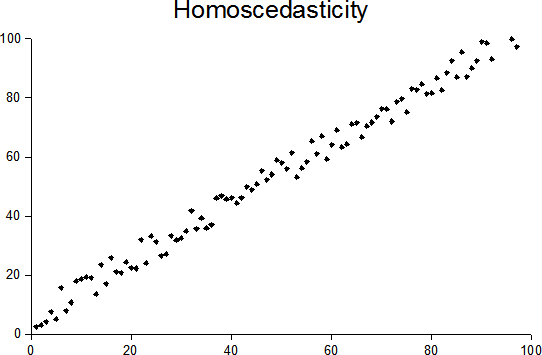 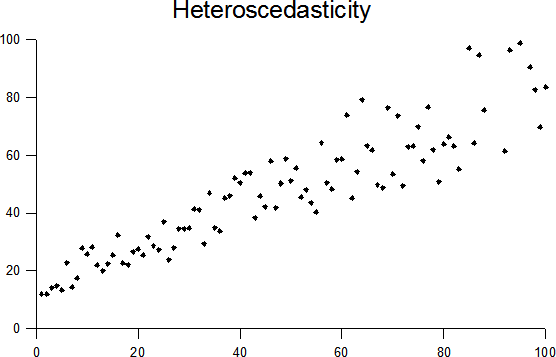




## Question:

__How to deal with polynomial regeression?__ <br>
__How to deal with this kind of distribution?__

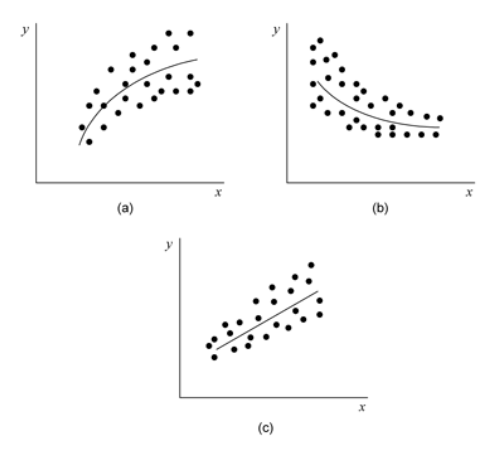
Answer: http://reliawiki.org/index.php/Simple_Linear_Regression_Analysis

## Metrics to select best Linear regression model and Evaluation


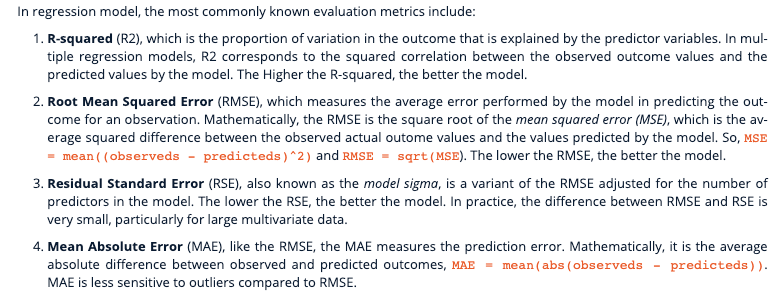


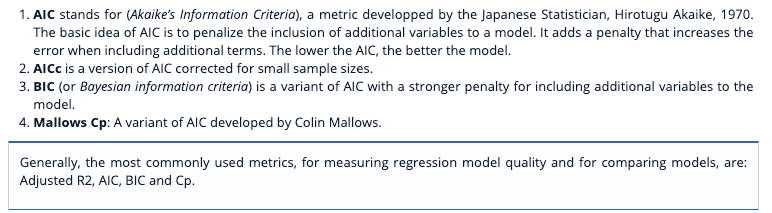


# references 
https://online.stat.psu.edu/stat501/book/export/html/981

https://www.geogebra.org/m/xC6zq7Zv

https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/
    

# Fundamentals

In [17]:
%config IPCompleter.greedy=True

In [110]:
# importing libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression


In [111]:
# loading data 
boston= load_boston()
data= boston.data
targets= boston.target
features= boston.feature_names
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [112]:
# scaling of the data 
from sklearn.preprocessing import StandardScaler
std_scaler= StandardScaler()
std_data= std_scaler.fit_transform(data)
std_data


array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [113]:
# spliting the dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(std_data,targets,test_size=0.3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
# need to reshape the targets 
y_train,y_test= y_train.reshape((-1,1)),y_test.reshape((-1,1))
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(354, 13) (152, 13) (354,) (152,)
(354, 13) (152, 13) (354, 1) (152, 1)


## Regression

In [114]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)
preds= lr.predict(x_test)

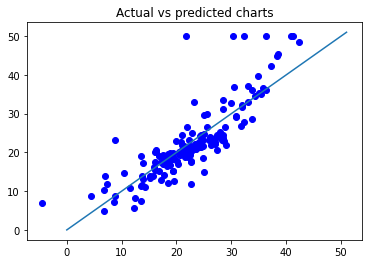

In [115]:
import matplotlib.pyplot as plt 
plt.title("Actual vs predicted charts")
plt.scatter(preds,y_test,color='blue')
plt.plot([0,51],[0,51])
plt.show()

In [116]:
# checking most important feature 
print('Coefficients are:',lr.coef_)
print('Most important coefficient index is :',np.argmax(abs(lr.coef_) ))

Coefficients are: [[-1.07100664  1.13106641  0.4804223   0.39670048 -1.79120626  2.9406987
  -0.49030232 -3.24878832  2.54776059 -2.57040945 -1.94879798  1.00921017
  -3.09599624]]
Most important coefficient index is : 7


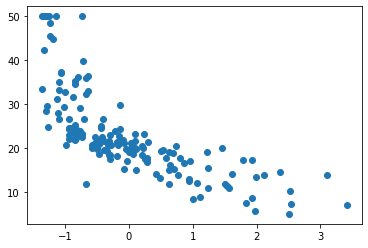

In [117]:
#plotting with the most important feature and target variable 
plt.scatter(x_test[:,12],y_test)
plt.show()

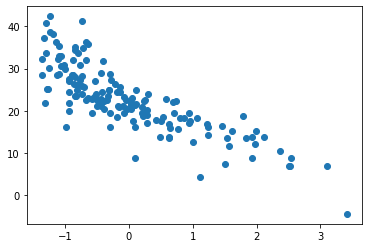

In [118]:
#now the predicted output and the most important feature 
plt.scatter(x_test[:,12],preds)
plt.show()

In [119]:
def mae(preds, actuals):
    '''
    Compute mean absolute error.
    '''
    return np.mean(np.abs(preds - actuals))

def rmse(preds, actuals):
    '''
    Compute root mean squared error.
    '''
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 3.4889 
Root mean squared error: 5.1447


## Manual Regression 


In [121]:
from tqdm import tqdm
class LinearRegressionCode:
    def __init__(self):
        self.weights={}
        self.loss=0
        self.learning_rate=0
        self.feature=0
        self.loss_arr=[]
        self.x=[]
        self.y=[]
        self.start=0
        self.batch_size=0
        self.batch=0
        
    def init_weights(self):
        '''
        Initializing weights
        '''
#         print('Initializing weights')
        self.weights['W']= np.random.randn(self.feature,1)
        self.weights['B']=np.random.randn(1,1)
#         print('Weights Dimension:', self.weights['W'].shape,self.weights['B'].shape)
    
    def forward_pass(self):
        '''
        Forward pass 
        '''
        N=np.dot(self.x, self.weights['W'])
        P= N+self.weights['B']
        self.loss= np.mean(np.power(self.y-P,2))
        self.weights['N']=N
        self.weights["P"]=P
        self.loss_arr.append(self.loss)

    def backward_pass(self):
        '''
        Backward Pass
        '''
        dl_dp= -2*(self.y - self.weights['P'])
        dp_dn= np.ones_like(self.weights['N'])
        dp_db= np.ones_like(self.weights['B'])
        dl_dn= dl_dp*dp_dn
        dn_dw= np.transpose(self.x,(1,0))
        dl_dw= np.dot(dn_dw,dl_dn)
        dl_db= (dl_dp*dp_db).sum(axis=0)
        self.weights['dldw']=dl_dw
        self.weights['dldb']=dl_db

    def permute_data(self,X,Y):
        '''
        permutating the dataset
        '''
        perm= np.random.permutation(X.shape[0])
        return X[perm],Y[perm]

    def generate_batch(self,X, Y):
        '''
        Generating batch
        '''
        assert X.ndim==Y.ndim==2, 'X and Y dimension must be same'
        if self.start+self.batch_size>=X.shape[0]:
            self.batch= X.shape[0]-self.start
        
        self.x,self.y = X[self.start:self.start+self.batch],Y[self.start:self.start+self.batch]
#         print('x shape, y_shape',self.x.shape,self.y.shape)

    def train(self,X,Y,learning_rate=0.01,n_iter=10,batch_size=100, seed=1):
        '''
        Training the data 
        '''

        if seed:
            np.random.seed(seed)

        self.learning_rate=learning_rate
        self.batch_size= batch_size
        self.batch=batch_size
        self.feature= X.shape[1]
        print('Feature:', X.shape[1])

        #initializing the weights
        self.init_weights()

        for i in tqdm(range(n_iter)):
            if self.start >= X.shape[0]:
                X,Y= self.permute_data(X,Y)
                self.start=0
                self.batch=batch_size
                
            self.generate_batch(X,Y)
            self.start+=self.batch_size

            self.forward_pass()
            self.backward_pass()
            
            #updating the weights 
            self.weights["W"]-= self.learning_rate*self.weights['dldw']
            self.weights["B"]-= self.learning_rate*self.weights['dldb']
            
        return self.weights,self.loss_arr

    def predict(self,x_test):
        '''
        Predicting the test data 
        '''
        return np.dot(x_test,self.weights['W'])+self.weights['B']



In [122]:
lr_manual= LinearRegressionCode()
weights,losses= lr_manual.train(x_train,y_train, learning_rate=0.001,n_iter=1000,batch_size=10)

100%|██████████| 1000/1000 [00:00<00:00, 21912.55it/s]

Feature: 13


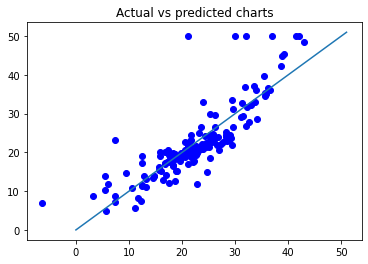

In [127]:
preds= lr_manual.predict(x_test)
plt.title("Actual vs predicted charts")
plt.scatter(preds,y_test,color='blue')
plt.plot([0,51],[0,51])
plt.show()

In [128]:
# Printing the coeffecient and maximum coefficient 
print('Coefficients are :', weights["W"].flatten())
print('Maximum value of the coeffcient is:', np.argmax(weights['W'].flatten()))

Coefficients are : [-1.03990503  1.05285224  0.05976879  0.41543916 -1.70834436  3.06746691
 -0.58729621 -3.11003948  1.78268362 -1.79540594 -1.95371241  1.12052061
 -3.32093939]
Maximum value of the coeffcient is: 5


In [129]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 3.4671 
Root mean squared error: 5.1766


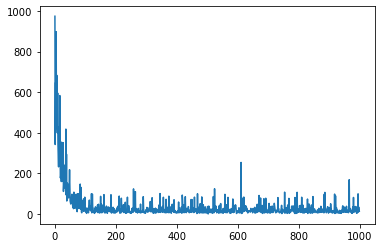

In [130]:
#plotting the loss 
plt.plot(losses)

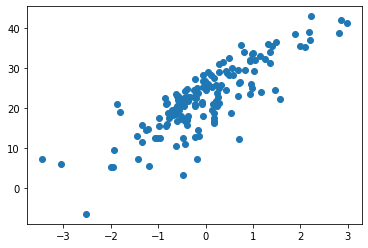

In [133]:
# here most important feature is 5 
# lets plot it with x_test
plt.scatter(x_test[:,5],preds)
plt.show()

## Neural Network Regressor

In [157]:
from tqdm import tqdm
class NNLinearRegression:
    def __init__(self):
        self.weights={}
        self.loss=0
        self.learning_rate=0
        self.feature=0
        self.loss_arr=[]
        self.x=[]
        self.y=[]
        self.start=0
        self.batch_size=0
        self.batch=0
        self.input_size=0
        self.hidden_size=0
        
    def init_weights(self):
        '''
        Initializing weights
        '''
#         print('Initializing weights')
        self.weights['W1']= np.random.randn(self.feature,self.hidden_size)
        self.weights['B1']=np.random.randn(1,self.hidden_size)
        self.weights['W2']= np.random.randn(self.hidden_size,1)
        self.weights['B2']=np.random.randn(1,1)
#         print('Weights Dimension:', self.weights['W'].shape,self.weights['B'].shape)
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-1.0 * x))
        
    
    def forward_pass(self):
        '''
        Forward pass 
        '''
        H1=np.dot(self.x, self.weights['W1'])
        N1= H1+self.weights['B1']
        
        O1=self.sigmoid(N1)
        
        H2= np.dot(O1,self.weights['W2'])
        P= H2+self.weights['B2']
        
        self.loss= np.mean(np.power(self.y-P,2))
        self.weights['H1']=H1
        self.weights["N1"]=N1
        self.weights['H2']=H2
        self.weights["P"]=P
        self.weights["O1"]=O1
        
        self.loss_arr.append(self.loss)

    def backward_pass(self):
        '''
        Backward Pass
        '''
        dl_dp= -2*(self.y - self.weights['P'])
        dp_dm2= np.ones_like(self.weights['H2'])
        
        dl_dm2= dl_dp*dp_dm2
        
        dp_db2= np.ones_like(self.weights["B2"])
        dl_db2=(dl_dp* dp_db2).sum(axis=0)
        
        dm2_dw2= np.transpose(self.weights['O1'], (1, 0))
        dl_dw2 = np.dot(dm2_dw2, dl_dp)
        
        dm2_do1= np.transpose(self.weights["W2"],(1,0))
        dl_do1= np.dot(dl_dm2,dm2_do1)
        
        do1_dn1 =self.sigmoid(self.weights['N1']) * (1- self.sigmoid(self.weights['N1']))
        
        dl_dn1 = dl_do1 * do1_dn1
        
        dn1_db1 = np.ones_like(self.weights['B1'])
    
        dn1_dm1 = np.ones_like(self.weights['H1'])

        
        dl_db1 = (dl_dn1 * dn1_db1).sum(axis=0)
        

        dl_dm1 = dl_dn1 * dn1_dm1

        dm1_dw1 = np.transpose(self.x, (1, 0)) 

        dl_dw1 = np.dot(dm1_dw1, dl_dm1)

        self.weights['dldw1']=dl_dw1
        self.weights['dldb1']=dl_db1.sum(axis=0)
        self.weights['dldw2']=dl_dw2
        self.weights['dldb2']=dl_db2.sum(axis=0)

    def permute_data(self,X,Y):
        '''
        permutating the dataset
        '''
        perm= np.random.permutation(X.shape[0])
        return X[perm],Y[perm]

    def generate_batch(self,X, Y):
        '''
        Generating batch
        '''
        assert X.ndim==Y.ndim==2, 'X and Y dimension must be same'
        if self.start+self.batch_size>=X.shape[0]:
            self.batch= X.shape[0]-self.start
        
        self.x,self.y = X[self.start:self.start+self.batch],Y[self.start:self.start+self.batch]
#         print('x shape, y_shape',self.x.shape,self.y.shape)

    def train(self,X,Y,learning_rate=0.01,n_iter=10,batch_size=100, seed=1):
        '''
        Training the data 
        '''

        if seed:
            np.random.seed(seed)

        self.learning_rate=learning_rate
        self.batch_size= batch_size
        self.batch=batch_size
        self.feature= X.shape[1]
        self.hidden_size= 13
        print('Feature:', X.shape[1])

        #initializing the weights
        self.init_weights()

        for i in tqdm(range(n_iter)):
            if self.start >= X.shape[0]:
                X,Y= self.permute_data(X,Y)
                self.start=0
                self.batch=batch_size
                
            self.generate_batch(X,Y)
            self.start+=self.batch_size

            self.forward_pass()
            self.backward_pass()
            
            #updating the weights 
            self.weights["W1"]-= self.learning_rate*self.weights['dldw1']
            self.weights["B1"]-= self.learning_rate*self.weights['dldb1']
            self.weights["W2"]-= self.learning_rate*self.weights['dldw2']
            self.weights["B2"]-= self.learning_rate*self.weights['dldb2']
            
        return self.weights,self.loss_arr

    def predict(self,x_test):
        '''
        Predicting the test data 
        '''
        H1= np.dot(x_test,self.weights['W1'])
        N1= H1+self.weights['B1']
        
        O1= self.sigmoid(N1)
        
        H2= np.dot(O1,self.weights["W2"])
        P= H2+self.weights['B2']
        
        return P




In [158]:
nnlinear= NNLinearRegression()
weights,losses= nnlinear.train(x_train,y_train, learning_rate=0.001,n_iter=1000,batch_size=10)

100%|██████████| 1000/1000 [00:00<00:00, 12441.02it/s]

Feature: 13


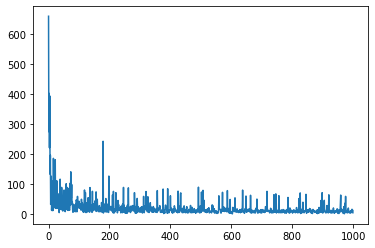

In [159]:
#plotting the loss 
plt.plot(losses) # looking great

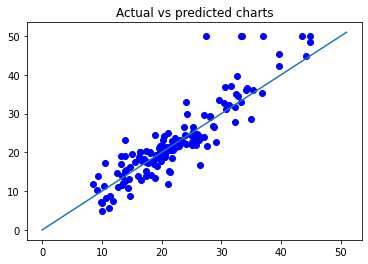

In [160]:
#predict
preds= nnlinear.predict(x_test)
plt.title("Actual vs predicted charts")
plt.scatter(preds,y_test,color='blue')
plt.plot([0,51],[0,51])
plt.show()


In [161]:
# calculating the loss 
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))
'''you will get  lower loss value compared to previous one'''

Mean absolute error: 2.8876 
Root mean squared error: 4.3117


'you will get  lower loss value compared to previous one'